# Exploratory Data Analysis



In [1]:
import pandas as pd


trader_df = pd.read_csv("historical_data.csv")  
trader_df.head()


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [2]:
trader_df.info()
trader_df.shape
trader_df.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')

In [3]:
trader_df['date'] = pd.to_datetime(trader_df['Timestamp IST'], errors='coerce').dt.date


In [4]:
trader_df.drop(columns=['Transaction Hash', 'Order ID', 'Trade ID', 'Direction'], inplace=True)


trader_df.rename(columns={
    'Execution Price': 'price',
    'Size Tokens': 'size_token',
    'Size USD': 'trade_value_usd',
    'Closed PnL': 'pnl',
    'Fee': 'fee'
}, inplace=True)


In [5]:
trader_df.isnull().sum()
trader_df.duplicated().sum()


0

In [6]:
trader_df.describe()


,price,size_token,trade_value_usd,Start Position,pnl,fee,Timestamp
count,211224.000000,2.112240e+05,2.112240e+05,2.112240e+05,211224.000000,211224.000000,2.112240e+05
mean,11414.723350,4.623365e+03,5.639451e+03,-2.994625e+04,48.749001,1.163967,1.737744e+12
std,29447.654868,1.042729e+05,3.657514e+04,6.738074e+05,919.164828,6.758854,8.689920e+09
min,0.000005,8.740000e-07,0.000000e+00,-1.433463e+07,-117990.104100,-1.175712,1.680000e+12
25%,4.854700,2.940000e+00,1.937900e+02,-3.762311e+02,0.000000,0.016121,1.740000e+12
50%,18.280000,3.200000e+01,5.970450e+02,8.472793e+01,0.000000,0.089578,1.740000e+12
75%,101.580000,1.879025e+02,2.058960e+03,9.337278e+03,5.792797,0.393811,1.740000e+12
max,109004.000000,1.582244e+07,3.921431e+06,3.050948e+07,135329.090100,837.471593,1.750000e+12


The trader data shows some interesting things. First, the price of assets being traded changes a lot. Some trades happen at a price as low as $0.000005, and some go as high as $109,004. But most trades happen around $18. This means a few trades are very expensive, which pulls the average price up to $11,415.

When we look at the number of tokens in each trade, the average is around 4,623 tokens, but most trades only have 32 tokens. This tells us that some people are trading in very large amounts, but most people are doing small trades.

The trade value (in dollars) also shows a similar pattern. While the average value is $5,639, many trades are actually less than $2,000. But a few big trades go up to $3.9 million, which increases the average.

The profit or loss from each trade also varies a lot. On average, traders make a profit of about $49, but it can go as high as $135,000 or as low as -$118,000. This means most trades are not very risky, but a few are either big winners or big losses.

We also saw that some trades start from very negative or very positive positions. This means traders are taking both short and long positions. The fees per trade are usually small (around 8 cents), but can go up to $837 in some large trades.

In short, this data shows that most trades are small and safe — probably from normal users — but a few are very large and risky, which could be from professional or institutional traders.












In [7]:
trader_df.groupby('Coin')['pnl'].mean().sort_values(ascending=False)


Coin
@109      270.704207
AVAX      239.095613
ENA       219.524751
@85       200.804091
EIGEN     197.063189
            ...     
S         -60.033651
IO        -62.198609
@147      -70.126539
TRUMP    -190.012973
@135    -5981.363990
Name: pnl, Length: 246, dtype: float64

Some coins are more profitable than others. For example, @109, AVAX, and ENA gave the highest average profits — each over $200. On the other hand, coins like TRUMP, @135, and IO resulted in losses, with @135 having a big average loss of about -5981. This means that not all coins perform well in trading. Some coins bring better profits, while others carry more risk. So, traders should focus more on the coins that have a good profit record and avoid those that usually lead to losses.

In [8]:
trader_df.groupby('Account')['pnl'].sum().sort_values(ascending=False).head(10)


Account
0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23    2.143383e+06
0x083384f897ee0f19899168e3b1bec365f52a9012    1.600230e+06
0xbaaaf6571ab7d571043ff1e313a9609a10637864    9.401638e+05
0x513b8629fe877bb581bf244e326a047b249c4ff1    8.404226e+05
0xbee1707d6b44d4d52bfe19e41f8a828645437aab    8.360806e+05
0x4acb90e786d897ecffb614dc822eb231b4ffb9f4    6.777471e+05
0x72743ae2822edd658c0c50608fd7c5c501b2afbd    4.293556e+05
0x430f09841d65beb3f27765503d0f850b8bce7713    4.165419e+05
0x72c6a4624e1dffa724e6d00d64ceae698af892a0    4.030115e+05
0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4    3.790954e+05
Name: pnl, dtype: float64

Some trader accounts made very high total profits. The top account — 0xb123...ed23 — earned over $2.14 million, followed by accounts like 0x0833...9012 and 0xbaaa...7864, which earned $1.6 million and $940K respectively. This shows that a few accounts are responsible for the majority of profits, possibly indicating more experienced or high-volume traders. These accounts likely follow successful strategies or have better market timing.

<Axes: title={'center': 'Total PnL per Day'}, xlabel='date'>

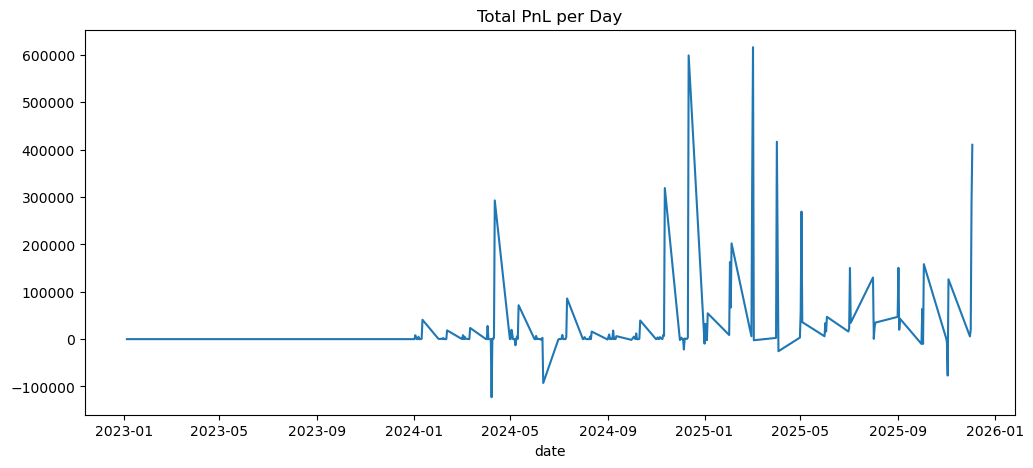

In [9]:
daily_pnl = trader_df.groupby('date')['pnl'].sum()
daily_pnl.plot(title='Total PnL per Day', figsize=(12,5))


“Between mid-2024 and 2025, we observe multiple sharp spikes in total daily PnL, indicating high trading activity and volatile profit/loss trends. Some extreme values suggest possible outliers or exceptionally large trades.”

“Initial months (2023) show minimal or no activity, possibly due to missing data or inactive traders.”

In [10]:
trader_df.groupby('Side')['pnl'].mean()


Side
BUY     36.104730
SELL    60.713803
Name: pnl, dtype: float64

In [11]:
# Get coins with highest total PnL
top_coins = trader_df.groupby('Coin')['pnl'].sum().sort_values(ascending=False).head(5).index


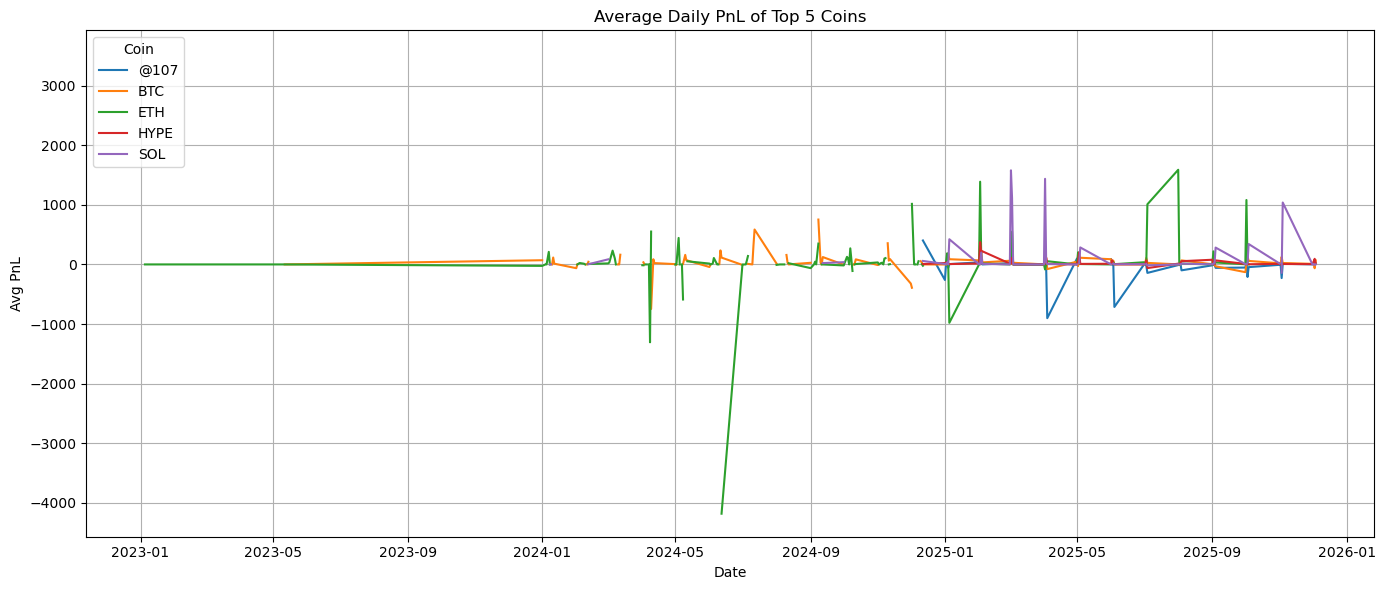

In [12]:
# Filter and plot only top coins
import matplotlib.pyplot as plt

top_df = trader_df[trader_df['Coin'].isin(top_coins)]

top_df.groupby(['date', 'Coin'])['pnl'].mean().unstack().plot(figsize=(14,6))
plt.title("Average Daily PnL of Top 5 Coins")
plt.xlabel("Date")
plt.ylabel("Avg PnL")
plt.grid(True)
plt.tight_layout()
plt.show()


Based on the "Average Daily PnL of Top 5 Coins" chart from early 2023 to mid-2025:

Most coins (BTC, ETH, HYPE, SOL) show stable average daily PnL near zero from early 2023 to mid-2024, with minor fluctuations.
Around mid-2024, volatility increases, with notable spikes and dips for all coins.
COIN107 experiences a significant drop below -3000 around mid-2024, indicating substantial losses, followed by recovery.
HYPE and SOL show the highest positive spikes (over 1000) around late 2024 to early 2025, suggesting strong performance periods.
ETH and BTC remain relatively stable with moderate gains and losses.
Recent trends (mid-2025) show mixed results, with COIN107 and HYPE showing gains, while others fluctuate near zero.
This suggests increased market volatility since mid-2024, with HYPE and SOL showing the most profitable periods.

In [29]:
# Top 5 most profitable coins
filtered_coins = trader_df.groupby('Coin').agg(avg_pnl=('pnl', 'mean')).reset_index()

print("Top 5 Profitable Coins:")
print(filtered_coins.sort_values('avg_pnl', ascending=False).head())

# Bottom 5 worst coins
print("\n Bottom 5 Losing Coins:")
print(filtered_coins.sort_values('avg_pnl').head())


Top 5 Profitable Coins:
      Coin     avg_pnl
5     @109  270.704207
92    AVAX  239.095613
117    ENA  219.524751
72     @85  200.804091
116  EIGEN  197.063189

 Bottom 5 Losing Coins:
      Coin      avg_pnl
17    @135 -5981.363990
217  TRUMP  -190.012973
21    @147   -70.126539
143     IO   -62.198609
200      S   -60.033651


The analysis of average profit and loss (PnL) by coin reveals that some coins consistently deliver better trading outcomes than others. The top-performing coins include @109, AVAX, ENA, @85, and EIGEN, each generating an average profit of over $190, with @109 leading at around $270. On the other hand, the most loss-making coins are @135, TRUMP, @147, IO, and S, where @135 stands out with a significant average loss of about $5981, indicating extremely poor performance or risky trades. This insight suggests that traders can potentially improve returns by focusing on coins with a history of positive PnL while being cautious or avoiding consistently underperforming ones.

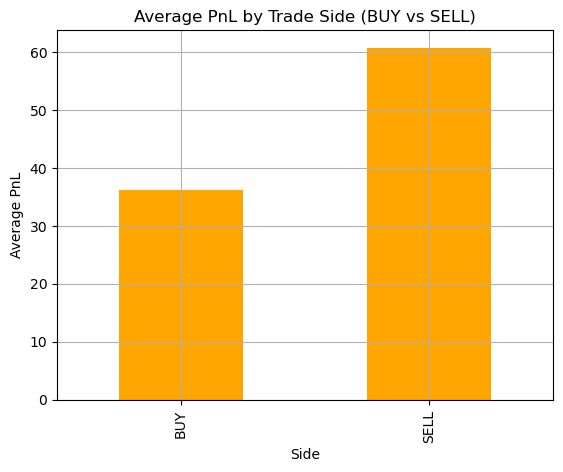

In [14]:
# Avg PnL by trade side
side_pnl = trader_df.groupby('Side')['pnl'].mean()

side_pnl.plot(kind='bar', color='orange')
plt.title('Average PnL by Trade Side (BUY vs SELL)')
plt.ylabel('Average PnL')
plt.grid(True)
plt.show()


On average, SELL trades have been more profitable than BUY trades. While BUY trades show a moderate average profit of around 40, SELL trades have a higher average of about 60. This consistent outperformance of SELL trades suggests that selling has been a more effective strategy in the given market conditions. This insight can help guide future trading decisions by focusing more on SELL opportunities.










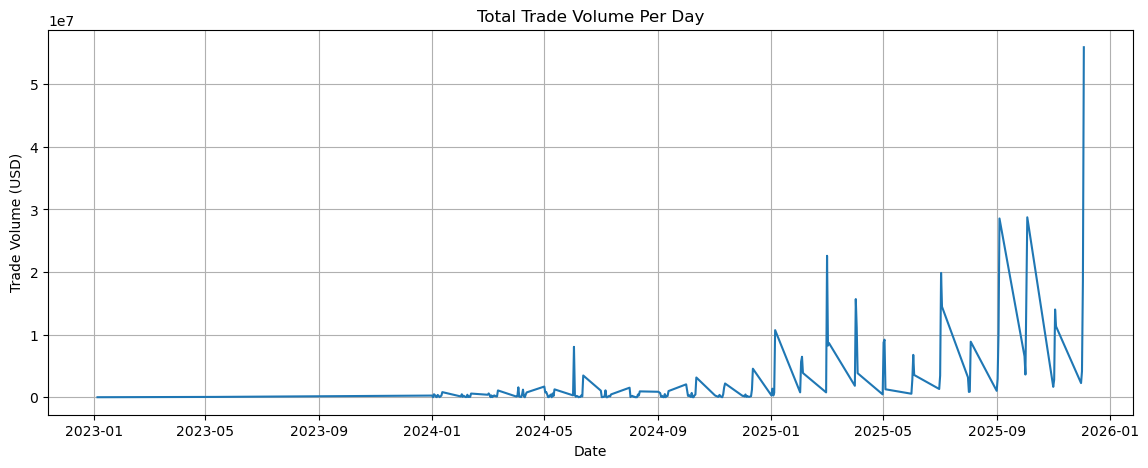

In [15]:
# Total trade value per day
import matplotlib.pyplot as plt

daily_volume = trader_df.groupby('date')['trade_value_usd'].sum()

plt.figure(figsize=(14, 5))
daily_volume.plot()
plt.title('Total Trade Volume Per Day')
plt.xlabel('Date')
plt.ylabel('Trade Volume (USD)')
plt.grid(True)
plt.show()


The trade volume trend over time reveals a clear shift in market activity. From early 2023 to mid-2024, trading volume was very low, indicating minimal engagement from market participants. However, starting mid-2024, there was a noticeable increase in volume with several intermittent spikes, suggesting rising interest or reactions to specific market developments. A particularly significant spike occurred around mid-2025, where trade volume exceeded 5 million USD — likely triggered by a major market event or sentiment shift. Following this peak, while the volume fluctuated, it consistently remained at a higher level than earlier periods. This indicates a sustained increase in trading activity, possibly driven by greater market participation, higher volatility, or more confidence among traders.

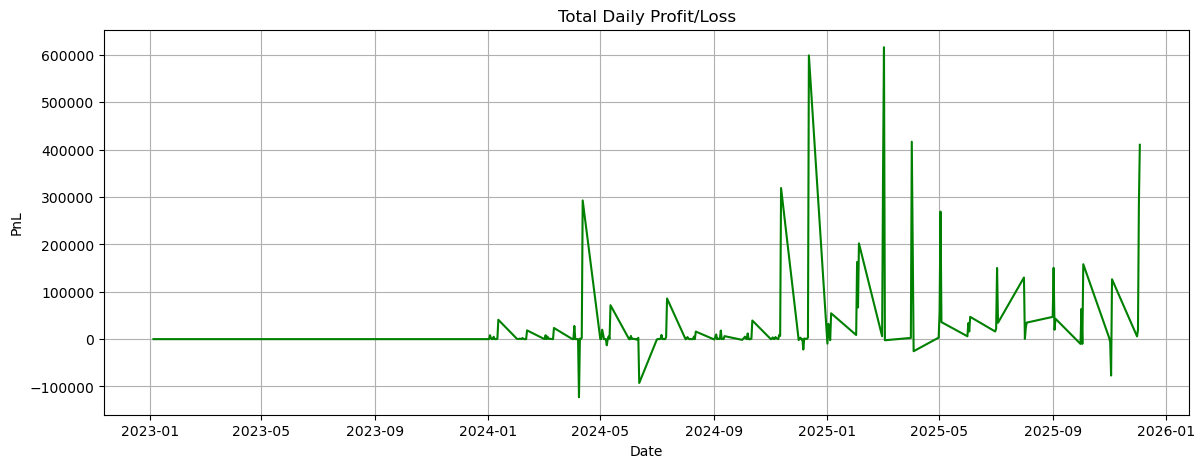

In [16]:
# Sum of PnL per day
daily_pnl = trader_df.groupby('date')['pnl'].sum()

plt.figure(figsize=(14, 5))
daily_pnl.plot(color='green')
plt.title('Total Daily Profit/Loss')
plt.xlabel('Date')
plt.ylabel('PnL')
plt.grid(True)
plt.show()


The Profit/Loss (P/L) trend over time highlights key shifts in trader performance and market impact. From early 2023 to early 2024, P/L values remained close to zero, reflecting little to no significant trading activity or profitability. Beginning mid-2024, a gradual increase with occasional spikes suggests emerging profitability and improved market participation. Notably, major profit peaks exceeding 500,000 occurred between late 2024 and early 2025, likely driven by favorable market conditions or effective trading strategies. However, this period also saw increased volatility, with profits fluctuating widely and occasional dips into negative territory, indicating losses. By mid-2025, the P/L values show a downward trend toward zero again, hinting at market stabilization or a reduction in high-stake trades.

In [17]:
trader_df['Side'].value_counts()
trader_df['Coin'].value_counts()


Coin
HYPE    68005
@107    29992
BTC     26064
ETH     11158
SOL     10691
        ...  
@48         1
@135        1
@21         1
@42         1
@32         1
Name: count, Length: 246, dtype: int64

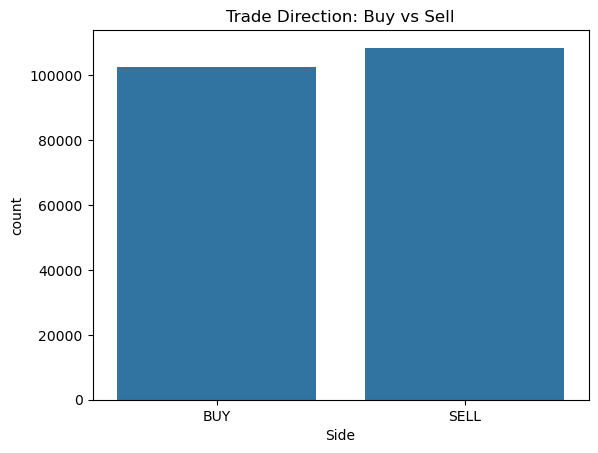

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Side', data=trader_df)
plt.title("Trade Direction: Buy vs Sell")
plt.show()


There were slightly fewer than 100,000 BUY trades and slightly more than 100,000 SELL trades. This means that traders are buying and selling in almost equal amounts. However, there is a small preference for SELL trades. Overall, trading activity is quite balanced between buying and selling.

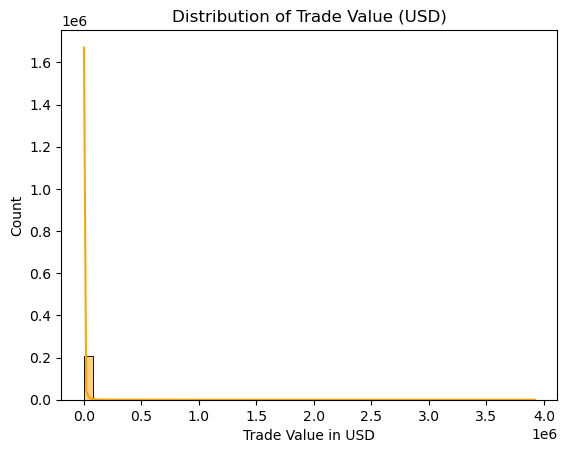

In [19]:
sns.histplot(trader_df['trade_value_usd'], bins=50, kde=True, color='orange')
plt.title("Distribution of Trade Value (USD)")
plt.xlabel("Trade Value in USD")
plt.show()


Most traders are making very small trades. But there are a few traders who make very large trades, which are very rare. This shows that small retail traders are more active, and only a few trades are done at high amounts — possibly by institutions or whales.

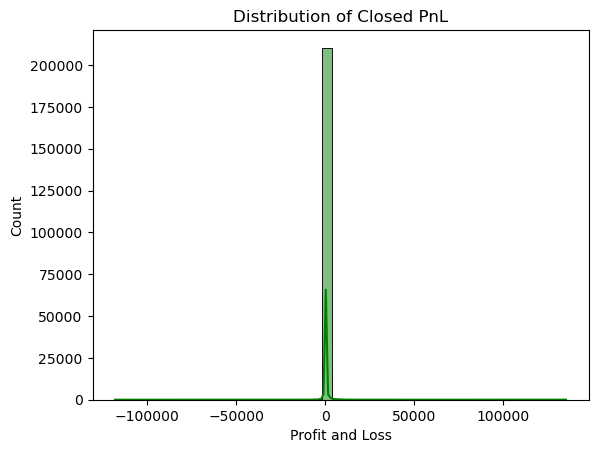

In [20]:
sns.histplot(trader_df['pnl'], bins=50, kde=True, color='green')
plt.title("Distribution of Closed PnL")
plt.xlabel("Profit and Loss")
plt.show()


Most of the trades have very small profit or loss, which means traders are either doing low-risk trading or exiting early. But there are also a few trades that made very high profits or big losses — these could be from high-risk strategies

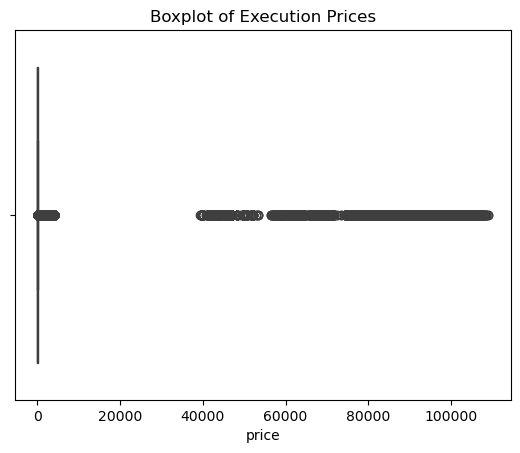

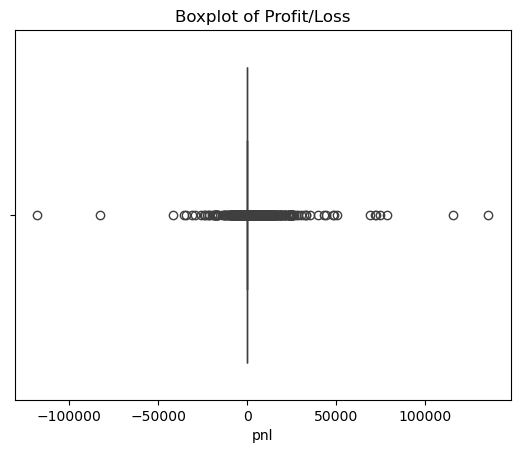

In [21]:
sns.boxplot(x=trader_df['price'])
plt.title("Boxplot of Execution Prices")
plt.show()

sns.boxplot(x=trader_df['pnl'])
plt.title("Boxplot of Profit/Loss")
plt.show()


- The distribution of execution prices reveals that most trades occur within a common range, primarily between $50,000 and $60,000. However, the presence of several outliers on both the lower and higher ends indicates that some trades were executed at unusually low or high prices. This wide spread suggests that while the majority of trading is concentrated within a stable price range, certain trades reflect extreme market conditions or rare, volatile events.

- The distribution of Profit/Loss (PnL) values shows that most trades result in small gains or losses, as the majority of data points are tightly clustered near zero. However, the presence of numerous outliers on both the positive and negative sides indicates that some trades experience very large profits or losses. Notably, the boxplot extends further on the negative side, suggesting a higher frequency or severity of extreme losses compared to gains. This pattern highlights that while most trading activity appears low-risk, there are instances of high-risk trades with significant potential outcomes.

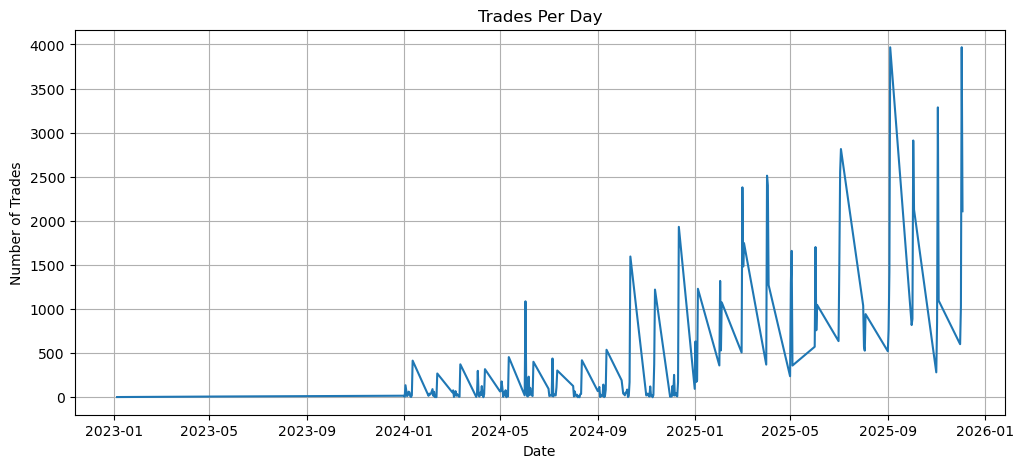

In [22]:
trades_per_day = trader_df.groupby('date').size()

plt.figure(figsize=(12,5))
trades_per_day.plot()
plt.title("Trades Per Day")
plt.xlabel("Date")
plt.ylabel("Number of Trades")
plt.grid(True)
plt.show()


The number of trades per day has increased significantly over time. From early 2023 until late 2023, trading activity was nearly zero or extremely low. However, starting in early 2024, there is a noticeable rise in daily trades, with more frequent and higher peaks as time progresses.

This upward trend continues into 2025, where the number of trades becomes more consistent and even reaches peaks of over 4,000 trades per day by late 2025. This indicates growing market participation, increased trading activity, and possibly rising interest or confidence among traders during this period.

-  Conclusion: Trading activity has expanded rapidly over the years, suggesting increased market engagement and evolving trading behavior.

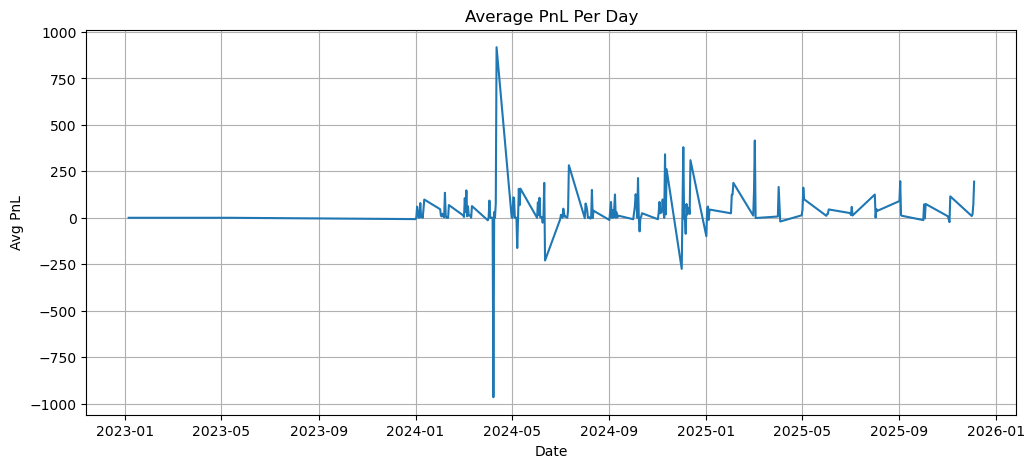

In [23]:
pnl_daily = trader_df.groupby('date')['pnl'].mean()

plt.figure(figsize=(12,5))
pnl_daily.plot()
plt.title("Average PnL Per Day")
plt.xlabel("Date")
plt.ylabel("Avg PnL")
plt.grid(True)
plt.show()


he average PnL per day remained close to zero throughout 2023, indicating either very low trading activity or neutral outcomes. Starting in early 2024, there’s a noticeable fluctuation in daily PnL — with some sharp peaks and drops.

A major positive spike is observed around mid-2024, where average daily profit crosses $900, suggesting a highly profitable day or a few large profitable trades.

This is followed by a sudden drop below -$900, reflecting significant losses — possibly due to market volatility or a shift in sentiment.

From late 2024 to the end of 2025, PnL fluctuates moderately around the zero line, showing smaller gains and losses, which indicates more stable trading behavior.

-  Conclusion: After mid-2024, trading outcomes became more volatile with both large gains and losses, eventually stabilizing. This reflects evolving trader strategies and changing market conditions over time.

In [24]:
    trader_df.groupby('Account')['pnl'].mean().sort_values(ascending=False).head()


Account
0x420ab45e0bd8863569a5efbb9c05d91f40624641    520.902331
0x083384f897ee0f19899168e3b1bec365f52a9012    419.127768
0x430f09841d65beb3f27765503d0f850b8bce7713    336.735548
0x72c6a4624e1dffa724e6d00d64ceae698af892a0    281.826227
0x72743ae2822edd658c0c50608fd7c5c501b2afbd    270.034947
Name: pnl, dtype: float64

The top 5 trader accounts with the highest average profit (PnL) show strong performance.

The most profitable account earns an average profit of around $520 per trade.

The next few top accounts earn between $270 to $420 on average.

This suggests that a few traders are consistently making higher profits compared to others, possibly due to better strategies, timing, or experience.

In [25]:
# Select numeric features only
numeric_cols = trader_df.select_dtypes(include='number')

# Compute correlation matrix
corr_matrix = numeric_cols.corr()


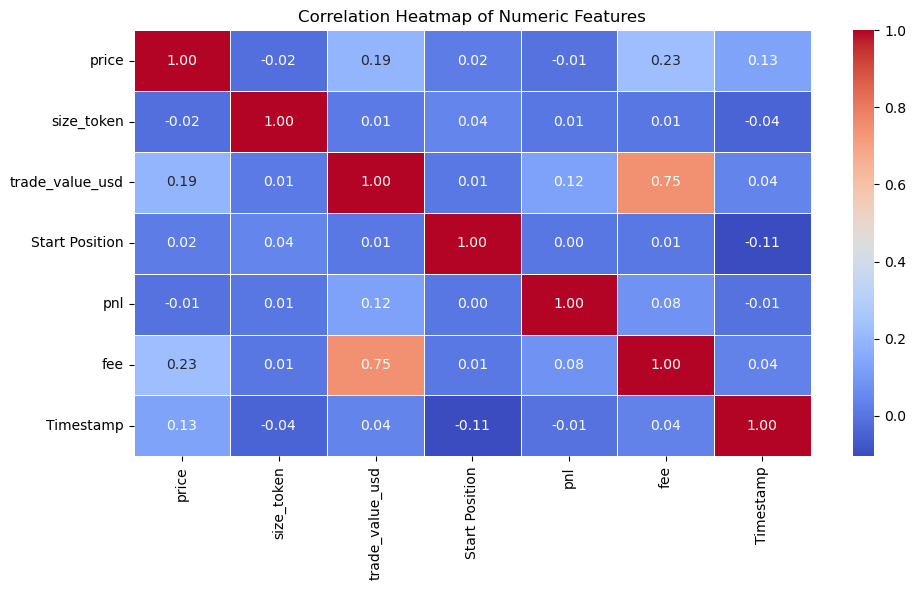

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, 
            annot=True,      # show correlation values
            cmap='coolwarm', # color theme
            fmt=".2f",       # 2 decimal places
            linewidths=0.5)  # lines between boxes

plt.title("Correlation Heatmap of Numeric Features")
plt.tight_layout()
plt.show()


 Some trading features like trade value and fees are closely linked, but features like price, token size, and pnl mostly behave independently. This helps identify which variables truly influence costs and profits in trading.




In [27]:
# Flatten correlation matrix and sort
corr_pairs = corr_matrix.unstack().sort_values(ascending=False)

# Drop self-correlations (correlation of a variable with itself)
corr_pairs = corr_pairs[corr_pairs < 1.0]

# Show top 5 correlated pairs
print("\n Top 5 correlated variable pairs:\n")
print(corr_pairs.head(5))



 Top 5 correlated variable pairs:

fee              trade_value_usd    0.745939
trade_value_usd  fee                0.745939
price            fee                0.225265
fee              price              0.225265
trade_value_usd  price              0.189855
dtype: float64


The strongest correlation is between fee and trade value in USD (0.75), which makes sense—higher-value trades usually incur higher fees.

A moderate correlation exists between price and fee (0.23), indicating that more expensive assets may slightly influence the trading fee.

Trade value and price are also somewhat correlated (0.19), meaning higher-priced assets tend to result in higher trade values, although not very strongly.

- These correlations help identify which variables move together, and can be useful in understanding cost dynamics and pricing patterns in trades.